In [3]:
!pip install pycaret

In [4]:
from pycaret.datasets import get_data
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [9]:
df = get_data('diamond')

df.head(20)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
5,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
6,1.00,Very Good,D,SI1,VG,G,GIA,5747
7,1.50,Fair,F,SI1,VG,VG,GIA,10450
8,2.11,Ideal,H,SI1,VG,VG,GIA,18609
9,1.05,Very Good,E,VS1,VG,G,GIA,7666


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for i in ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']:
    df[i] = encoder.fit_transform(df[i])

df.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,2,4,2,3,0,1,5169
1,0.83,2,4,3,2,2,0,3470
2,0.85,2,4,2,0,0,1,3183
3,0.91,2,1,2,3,3,1,4370
4,0.83,2,3,2,0,0,1,3171


In [11]:
s = setup(df, target = 'Price', session_id = 1212)

,Description,Value
0,Session id,1212
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 8)"
5,Transformed train set shape,"(4200, 8)"
6,Transformed test set shape,"(1800, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [12]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,668.8699,1860843.3263,1349.3554,0.9814,0.0693,0.0518,0.1780
lightgbm,Light Gradient Boosting Machine,669.7554,1913952.8058,1353.9592,0.9813,0.0704,0.0524,1.2780
gbr,Gradient Boosting Regressor,800.5787,2128386.8216,1448.1207,0.9786,0.0896,0.0681,0.2850
rf,Random Forest Regressor,749.4190,2177925.8869,1458.0995,0.9782,0.0811,0.0604,0.8350
et,Extra Trees Regressor,747.2519,2302144.8104,1497.0890,0.9771,0.0804,0.0603,0.8880
dt,Decision Tree Regressor,930.7172,3329561.9430,1808.7800,0.9664,0.1040,0.0754,0.0360
ridge,Ridge Regression,2617.3989,17860469.1445,4150.4897,0.8251,0.5429,0.2882,0.0280
br,Bayesian Ridge,2618.8041,17860284.5675,4150.6247,0.8250,0.5413,0.2885,0.0290
llar,Lasso Least Angle Regression,2618.9605,17860439.0172,4150.6508,0.8250,0.5389,0.2885,0.0270
lar,Least Angle Regression,2619.5840,17860408.8799,4150.7242,0.8250,0.5413,0.2887,0.0280


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

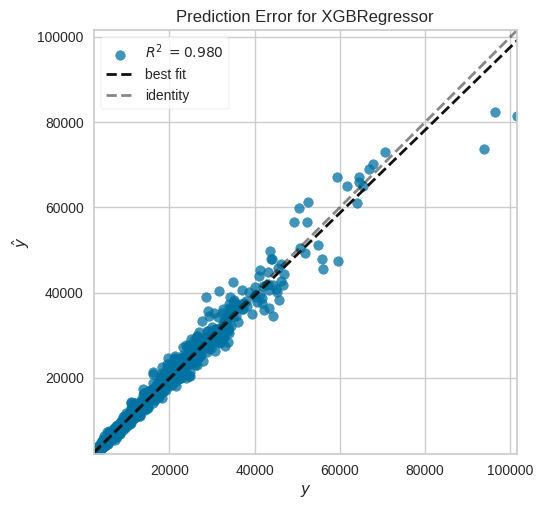

In [13]:
plot_model(best, plot = 'error')